# **Heart-Saver**
### Welcome everyone to this project! This project intends to teach you the basics of common Machine Learning models and also how to use them. The dataset used in this project is gathered from https://archive.ics.uci.edu/ml/datasets/Heart+Disease. Feel free to explore and try your best to contribute to this project.
### Good Luck and Happy Learning!

## **About Heart Disease**

> Cardiovascular disease or heart disease describes a range of conditions that affect your heart. Diseases under the heart disease umbrella include blood vessel diseases, such as coronary artery disease. From WHO statistics every year 17.9 million dying from heart disease. The medical study says that human life style is the main reason behind this heart problem. Apart from this there are many key factors which warns that the person may/maynot getting chance of heart disease.

> <img style="float: centre;" src="https://www.canwelivebetter.bayer.com/sites/default/files/2018-05/NEW_Heartbeat_looping_GIF_NORMAL_0.gif" width="600px"/>

> From the dataset if we create suitable machine learning technique which classify the heart disease more accurately, it is very helpful to the health organisation as well as patients. 

### Importing the necessary libraries and packages.

In [49]:
#loading dataset
import pandas as pd
import numpy as np
#visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#EDA
from collections import Counter
import pandas_profiling as pp
# data preprocessing
from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split
# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report,auc
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
#ensembling
from mlxtend.classifier import StackingCVClassifier

### Importing the csv file as a dataFrame

In [50]:
data = pd.read_csv('heart-saver.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Gathering some statistical data from the dataFrame

In [51]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Gathering details about the columns present in the dataFrame

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Finding out if there is any null datapoint present in the dataset 

In [53]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<h3>Creating a <b>Countplot</b> of <b>Target</b>.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of data points of each class')

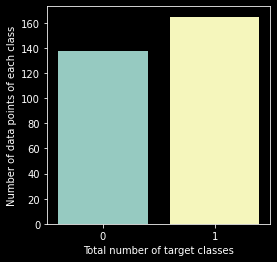

In [54]:
plt.style.use('dark_background')
plt.figure(figsize=(4,4))
sns.countplot(data['target'])
plt.xlabel('Total number of target classes')
plt.ylabel('Number of data points of each class')

<h3>Creating a <b>Countplot</b> of <b>Sex</b>.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Total datapoints for each sex')

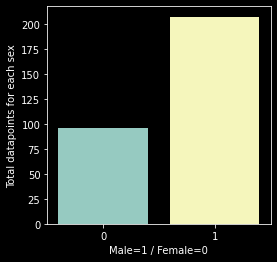

In [55]:
plt.figure(figsize=(4,4))
sns.countplot(data['sex'])
plt.xlabel('Male=1 / Female=0')
plt.ylabel('Total datapoints for each sex')

<h3>Creating a <b>distribution plot</b> with 'Age (age in years)' in it's x-axis.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Age (age in years)')

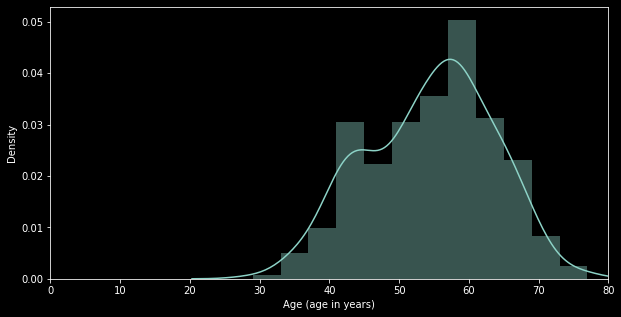

In [56]:
var='age'
f,ax=plt.subplots(figsize=(10,5))
sns.distplot(data[var])
plt.xlim([0,80])
plt.xlabel('Age (age in years)')

<h3>Create a <b>distribution plot</b> with 'Serum Cholesterol in mg/dl' in it's x-axis.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Serum Cholesterol in mg/dl')

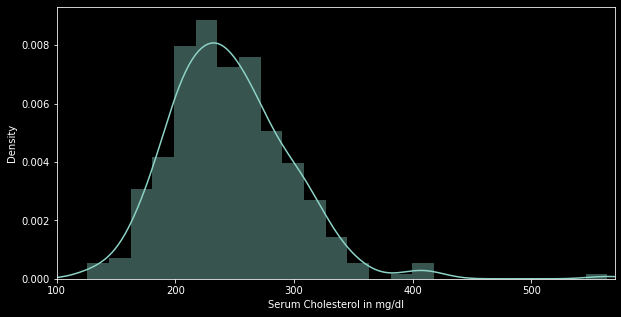

In [57]:
var='chol'
f,ax=plt.subplots(figsize=(10,5))
sns.distplot(data[var])
plt.xlim([100,570])
plt.xlabel('Serum Cholesterol in mg/dl')

### Create a <b>heatmap</b> of the dataset.

Text(0.5, 1.0, 'Correlation Heatmap')

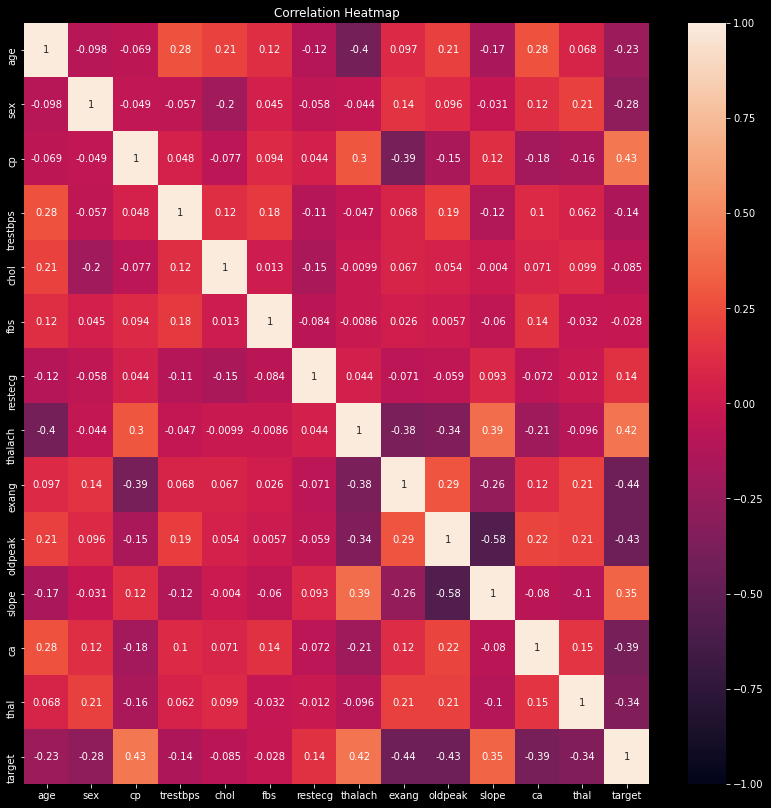

In [58]:
plt.figure(figsize=(14, 14))
heatmap = sns.heatmap(data.corr(), vmin= -1, vmax = 1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12})

### Now, dividing the dataset into 2 parts: 
#### X: which contains all the data except the <b>target</b> column<br>Y: which contains only the <b>target</b> column   

In [59]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]
print("//Independent features//")
print(X.head())
print("\n\n//Dependent feature//")
print(y.head())

//Independent features//
   age  sex  cp  trestbps  chol  fbs  ...  thalach  exang  oldpeak  slope  ca  thal
0   63    1   3       145   233    1  ...      150      0      2.3      0   0     1
1   37    1   2       130   250    0  ...      187      0      3.5      0   0     2
2   41    0   1       130   204    0  ...      172      0      1.4      2   0     2
3   56    1   1       120   236    0  ...      178      0      0.8      2   0     2
4   57    0   0       120   354    0  ...      163      1      0.6      2   0     2

[5 rows x 13 columns]


//Dependent feature//
0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64


### Split the <b>X</b> and <b>y</b> dataframes for test and training

In [60]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

<h3>Let's standardise <b>X_train</b> and <b>X_test</b> using <b>StandardScaler()</b></h3> 

In [61]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

<h3>Let's try <b>Logistic Regression (LR)</b></h3>
<h4>Also, it's Confusion Matrix.</h4>

In [62]:
# Logistic Regression
lr=LogisticRegression()
lr_mdl=lr.fit(X_train,y_train)
lr_pred=lr.predict(X_test)
lr_con_matrix=confusion_matrix(y_test,lr_pred)
lr_acc=accuracy_score(y_test,lr_pred)
print("Confusion Matrix",'\n',lr_con_matrix)
print('\n')
print("Accuracy of Logistic Regression: ",lr_acc*100,'\n')
print(classification_report(y_test,lr_pred))

Confusion Matrix 
 [[21  6]
 [ 3 31]]


Accuracy of Logistic Regression:  85.24590163934425 

              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



<h3>Let's try <b>Naive Bayes Approach (NB)</b></h3>
<h4>Also, it's Confusion Matrix.</h4>

In [63]:
#Naive Bayes
nb=GaussianNB()
nb_mdl=nb.fit(X_train,y_train)
nb_pred=nb.predict(X_test)
nb_con_matrix=confusion_matrix(y_test,nb_pred)
nb_acc=accuracy_score(y_test,nb_pred)
print("Confusion Matrix: \n",nb_con_matrix)
print('\n')
print("Accuracy of Naive Bayes: ",nb_acc*100,'\n')
print(classification_report(y_test,nb_pred))

Confusion Matrix: 
 [[21  6]
 [ 3 31]]


Accuracy of Naive Bayes:  85.24590163934425 

              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



<h3>Let's try <b>Random Forest Classfier (RFC)</b></h3>
<h4>Also, it's Confusion Matrix.</h4>

In [64]:
#Random Forest Classfier
rf = RandomForestClassifier(n_estimators=20, random_state=2,max_depth=5)
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)
rf_con_matrix = confusion_matrix(y_test, rf_pred)
rf_acc = accuracy_score(y_test, rf_pred)
print("Confusion Matrix\n",rf_con_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc*100,'\n')
print(classification_report(y_test,rf_pred))

Confusion Matrix
 [[22  5]
 [ 4 30]]


Accuracy of Random Forest: 85.24590163934425 

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



<h3>Let's try <b>Extreme Gradient Boost (XGB)</b></h3>
<h4>Also, it's Confusion Matrix.</h4>

In [65]:
#Extreme Gradient Boost
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
xgb_con_matrix = confusion_matrix(y_test, xgb_pred)
xgb_acc = accuracy_score(y_test, xgb_pred)
print("Confusion Matrix\n",xgb_con_matrix)
print('\n')
print("Accuracy of Extreme Gradient Boost:",xgb_acc*100,'\n')
print(classification_report(y_test,xgb_pred))


import pickle
file='xgb.pkl'
with open(file,'wb') as f:
    pickle.dump(xgb,f)

Confusion Matrix
 [[24  3]
 [ 3 31]]


Accuracy of Extreme Gradient Boost: 90.1639344262295 

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        27
           1       0.91      0.91      0.91        34

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



<h3>Let's try <b>K-Neighbors Classifier (KNN)</b></h3>
<h4>Also, it's Confusion Matrix.</h4>

In [66]:
#K-NeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_con_matrix = confusion_matrix(y_test, knn_pred)
knn_acc = accuracy_score(y_test, knn_pred)
print("Confusion Matrix\n",knn_con_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc*100,'\n')
print(classification_report(y_test,knn_pred))

Confusion Matrix
 [[24  3]
 [ 4 30]]


Accuracy of K-NeighborsClassifier: 88.52459016393442 

              precision    recall  f1-score   support

           0       0.86      0.89      0.87        27
           1       0.91      0.88      0.90        34

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61



<h3>Let's try <b>Decision Tree Classifier (DTC)</b></h3>
<h4>Also, it's Confusion Matrix.</h4>

In [67]:
#DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_con_matrix = confusion_matrix(y_test, dt_pred)
dt_acc = accuracy_score(y_test, dt_pred)
print("Confusion Matrix\n",dt_con_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc*100,'\n')
print(classification_report(y_test,dt_pred))

Confusion Matrix
 [[23  4]
 [ 7 27]]


Accuracy of DecisionTreeClassifier: 81.9672131147541 

              precision    recall  f1-score   support

           0       0.77      0.85      0.81        27
           1       0.87      0.79      0.83        34

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



<h3>Let's try <b>Support Vector Classifier (SVC)</b></h3>
<h4>Also, it's Confusion Matrix</h4>

In [68]:
#Support Vector Classifier
svc =  SVC(kernel='rbf', C=2, probability=True)
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
svc_con_matrix = confusion_matrix(y_test, svc_pred)
svc_acc = accuracy_score(y_test, svc_pred)
print("Confusion Matrix\n",svc_con_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc*100,'\n')
print(classification_report(y_test,svc_pred))

Confusion Matrix
 [[23  4]
 [ 3 31]]


Accuracy of Support Vector Classifier: 88.52459016393442 

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        27
           1       0.89      0.91      0.90        34

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



<h3>Let's try Gradient Boosting Classifier (GBC)</h3>

In [69]:
#Gradient Boosting Classifier
gbc=GradientBoostingClassifier(learning_rate=0.5,n_estimators=200)
gbc.fit(X_train,y_train)
gbc_pred=gbc.predict(X_test)
gbc_con_matrix = confusion_matrix(y_test, gbc_pred)
gbc_acc=accuracy_score(y_test,gbc_pred)
print("Confusion Matrix\n",gbc_con_matrix)
print("\n")
print("Accuracy of Gradient Boosting Classifier:",gbc_acc*100,'\n')
print(classification_report(y_test,gbc_pred))

filename='gbc.pkl'
with open(filename,'wb') as f:
    pickle.dump(gbc,f)

Confusion Matrix
 [[23  4]
 [ 5 29]]


Accuracy of Gradient Boosting Classifier: 85.24590163934425 

              precision    recall  f1-score   support

           0       0.82      0.85      0.84        27
           1       0.88      0.85      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



<h2><b>Receiver Operating Characteristic (ROC) Curve</b></h2>
<h3>Find out the ROC curves of all the models used in the dataset</h3>


Text(0.5, 0, 'False Positive Rate')

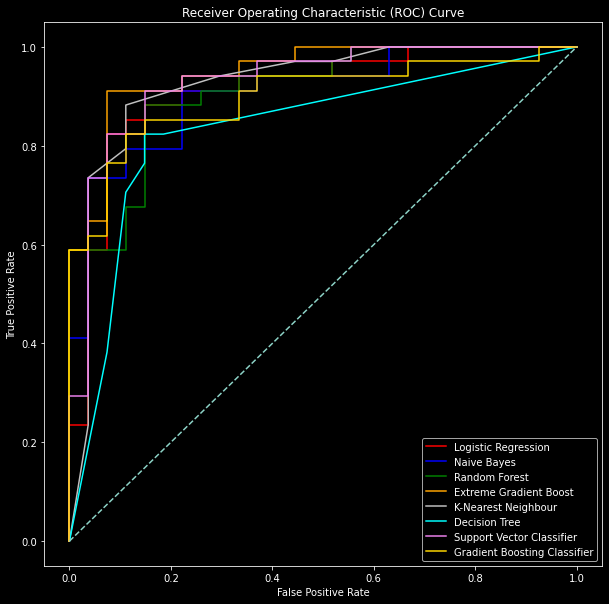

In [70]:
y_score1 = lr.predict_proba(X_test)[:,1]
y_score2 = nb.predict_proba(X_test)[:,1]
y_score3 = rf.predict_proba(X_test)[:,1]
y_score4 = xgb.predict_proba(X_test)[:,1]
y_score5 = knn.predict_proba(X_test)[:,1]
y_score6 = dt.predict_proba(X_test)[:,1]
y_score7 = svc.predict_proba(X_test)[:,1]
y_score8 = gbc.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(y_test, y_score3)
false_positive_rate4, true_positive_rate4, threshold4 = roc_curve(y_test, y_score4)
false_positive_rate5, true_positive_rate5, threshold5 = roc_curve(y_test, y_score5)
false_positive_rate6, true_positive_rate6, threshold6 = roc_curve(y_test, y_score6)
false_positive_rate7, true_positive_rate7, threshold7 = roc_curve(y_test, y_score7)
false_positive_rate8, true_positive_rate8, threshold8 = roc_curve(y_test, y_score8)

plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.plot(false_positive_rate1,true_positive_rate1, color='red', label = "Logistic Regression")
plt.plot(false_positive_rate2,true_positive_rate2, color='blue', label = "Naive Bayes")
plt.plot(false_positive_rate3,true_positive_rate3, color='green', label = "Random Forest")
plt.plot(false_positive_rate4,true_positive_rate4, color='orange', label = "Extreme Gradient Boost")
plt.plot(false_positive_rate5,true_positive_rate5, color='silver', label = "K-Nearest Neighbour")
plt.plot(false_positive_rate6,true_positive_rate6, color='cyan', label = "Decision Tree")
plt.plot(false_positive_rate7,true_positive_rate7, color='violet', label = "Support Vector Classifier")
plt.plot(false_positive_rate8,true_positive_rate8, color='gold', label = "Gradient Boosting Classifier")
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

<h2><b>Model Evaluation</b></h2>
<h3> Let's make a dataframe containing only the models and their accuracy.</h3>

In [71]:
mdl_evl = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Random Forest','Extreme Gradient Boost',
                    'K-Nearest Neighbour','Decision Tree','Support Vector Machine','Gradient Boosting Classifier'], 'Accuracy': [lr_acc*100,
                    nb_acc*100,rf_acc*100,xgb_acc*100,knn_acc*100,dt_acc*100,svc_acc*100,gbc_acc*100]})
mdl_evl

,Model,Accuracy
0,Logistic Regression,85.245902
1,Naive Bayes,85.245902
2,Random Forest,85.245902
3,Extreme Gradient Boost,90.163934
4,K-Nearest Neighbour,88.524590
5,Decision Tree,81.967213
6,Support Vector Machine,88.524590
7,Gradient Boosting Classifier,85.245902


### This barplot will show the accuracy of different models used as evaluation
Use the given palette to show the accuracy of the models

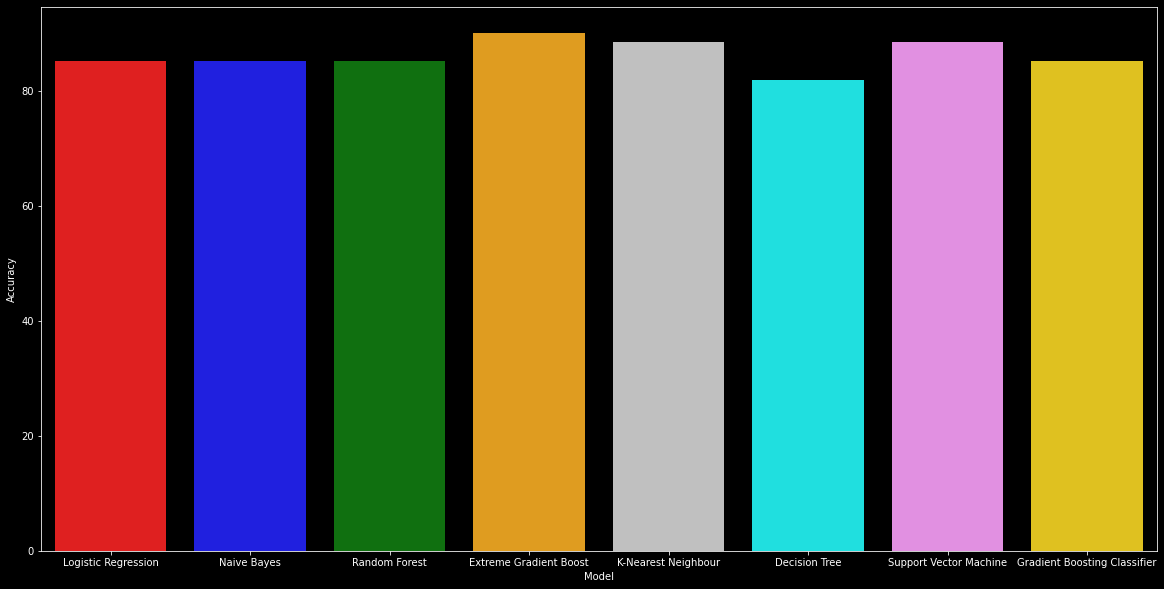

In [72]:
pal=['red','blue','green','orange','silver','cyan','violet','gold']
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(x="Model",y="Accuracy",palette=pal,data=mdl_evl)

## <b>CONCLUSION</b>
### So, the model which gave the best results among the others is <b>Extreme Gradient Boost</b>